In [2]:
import os
os.chdir("{}/..".format(os.getcwd()))
os.getcwd()


'/home/lukas/Projects/dmc2019'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scripts.utils import *


In [4]:
sns.set(style="whitegrid")
df_train = pd.read_csv("data/extended_train.csv", sep="|")

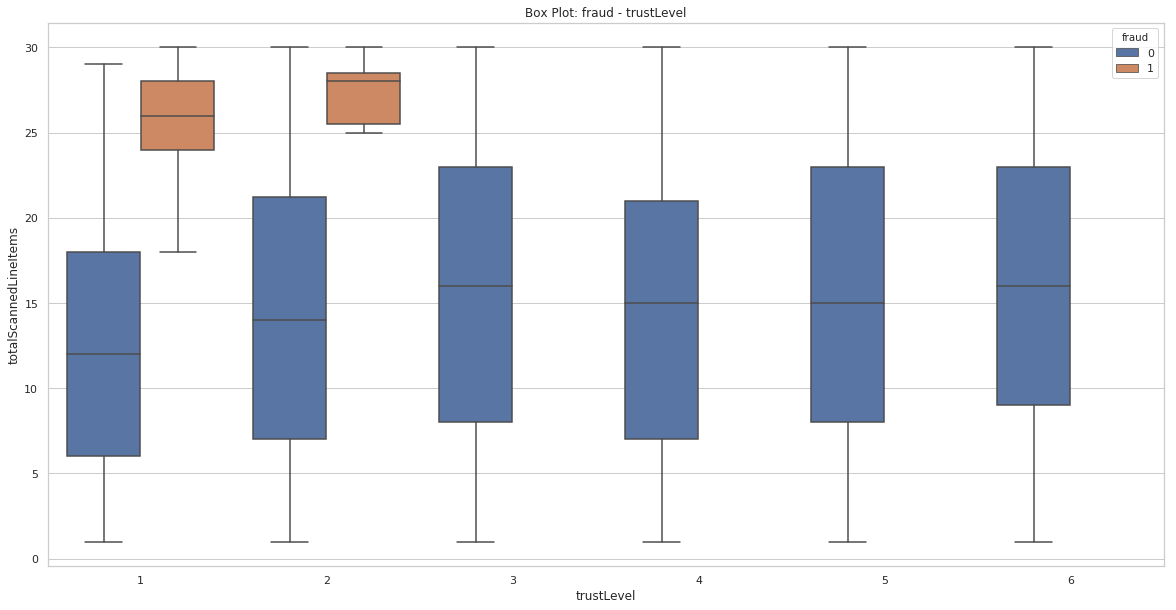

In [10]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Box Plot: fraud - trustLevel")
plt.show()

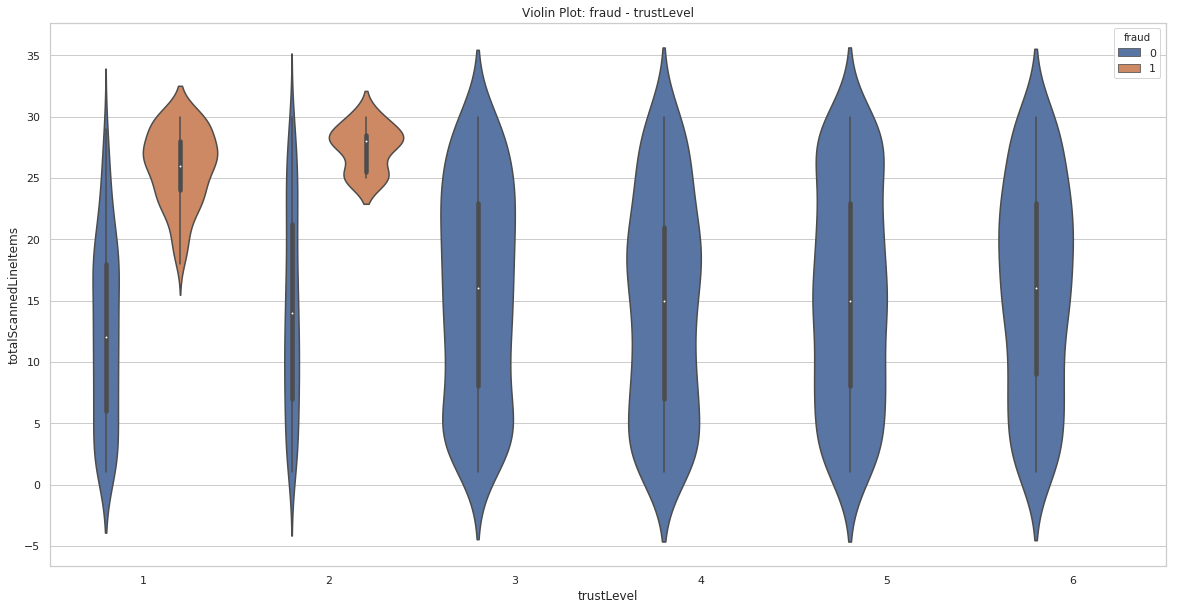

In [7]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Violin Plot: fraud - trustLevel")
plt.show()

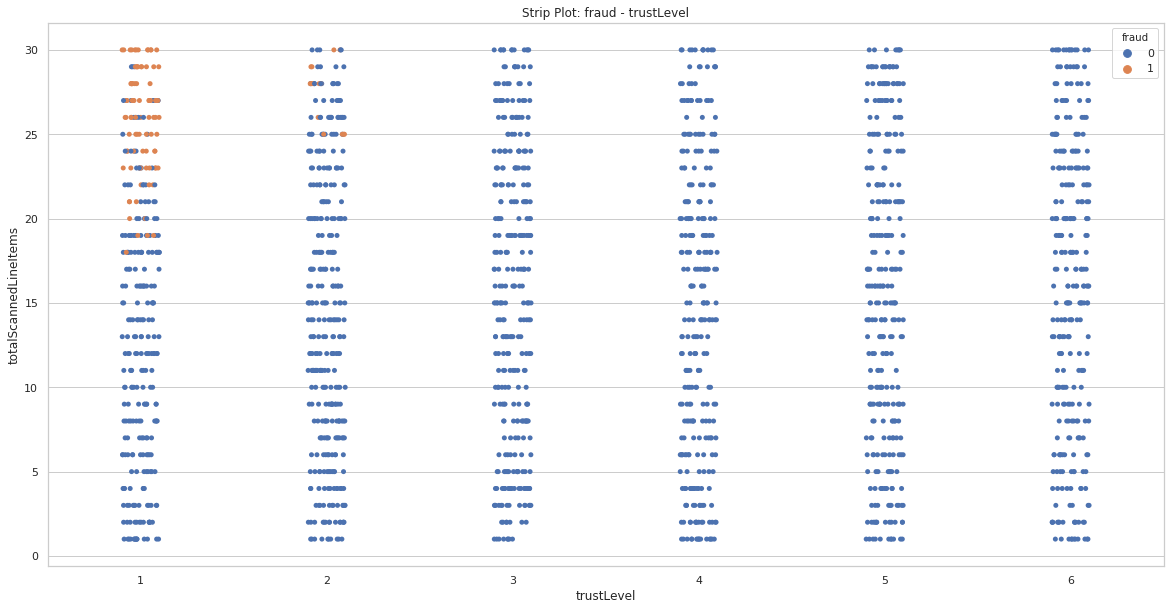

In [8]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.stripplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Strip Plot: fraud - trustLevel")
plt.show()

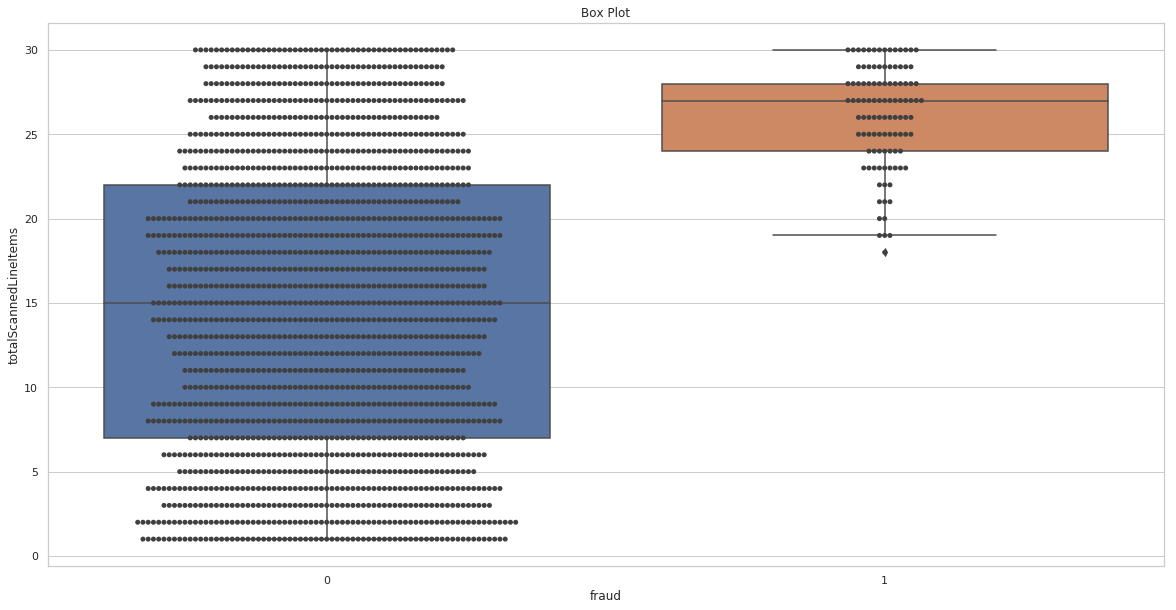

In [7]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train)
ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_train, color=".25")
plt.title("Box Plot")
plt.show()

## Plotting Box-Plots for each feature

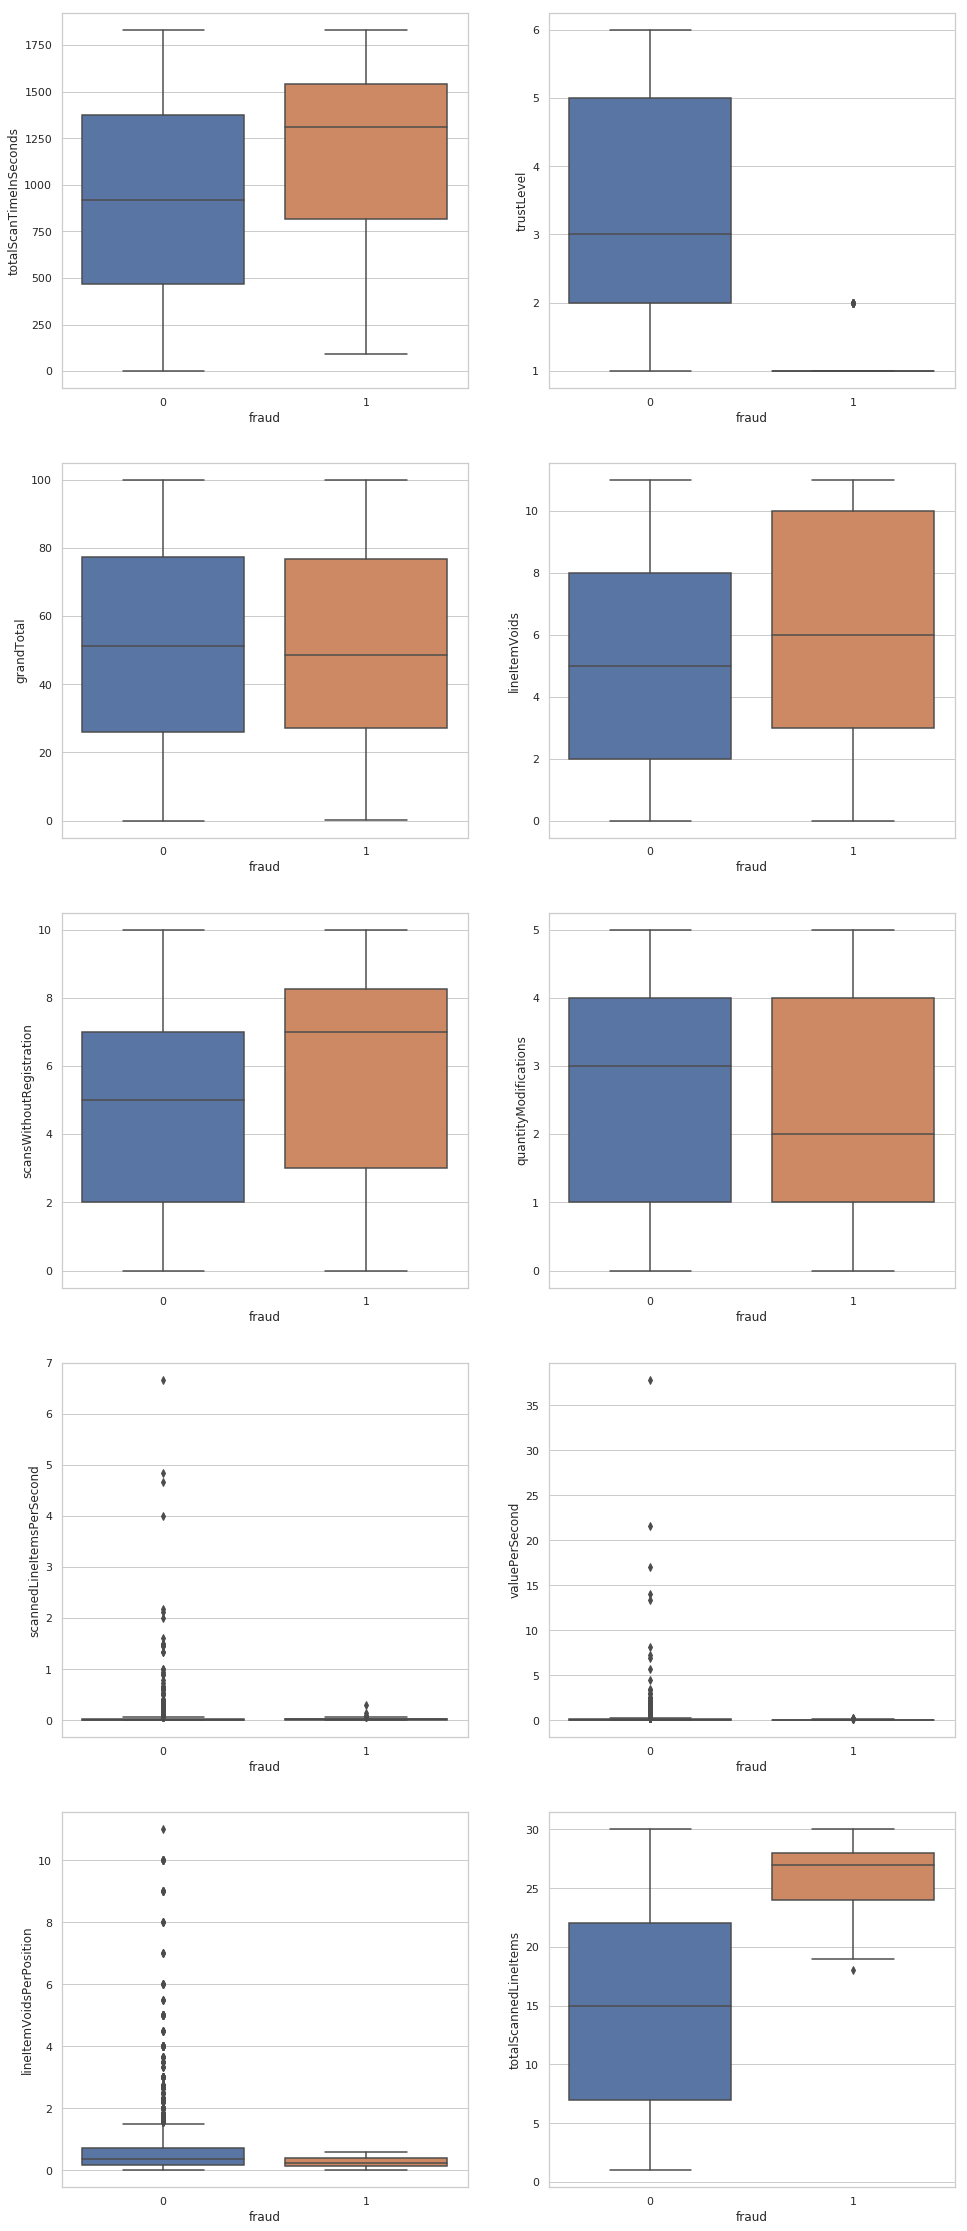

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.boxplot(x="fraud", y='totalScanTimeInSeconds', data=df_train, ax=axs[0][0])

sns.boxplot(x="fraud", y='trustLevel', data=df_train,ax=axs[0][1])

sns.boxplot(x="fraud", y='grandTotal', data=df_train, ax=axs[1][0])

sns.boxplot(x="fraud", y='lineItemVoids', data=df_train, ax=axs[1][1])

sns.boxplot(x="fraud", y='scansWithoutRegistration', data=df_train, ax=axs[2][0])

sns.boxplot(x="fraud", y='quantityModifications', data=df_train, ax=axs[2][1])

sns.boxplot(x="fraud", y='scannedLineItemsPerSecond', data=df_train, ax=axs[3][0])

sns.boxplot(x="fraud", y='valuePerSecond', data=df_train, ax=axs[3][1])

sns.boxplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train, ax=axs[4][0])

sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train, ax=axs[4][1])


## Plotting Frauds and Non Frauds seperately withj histrograms

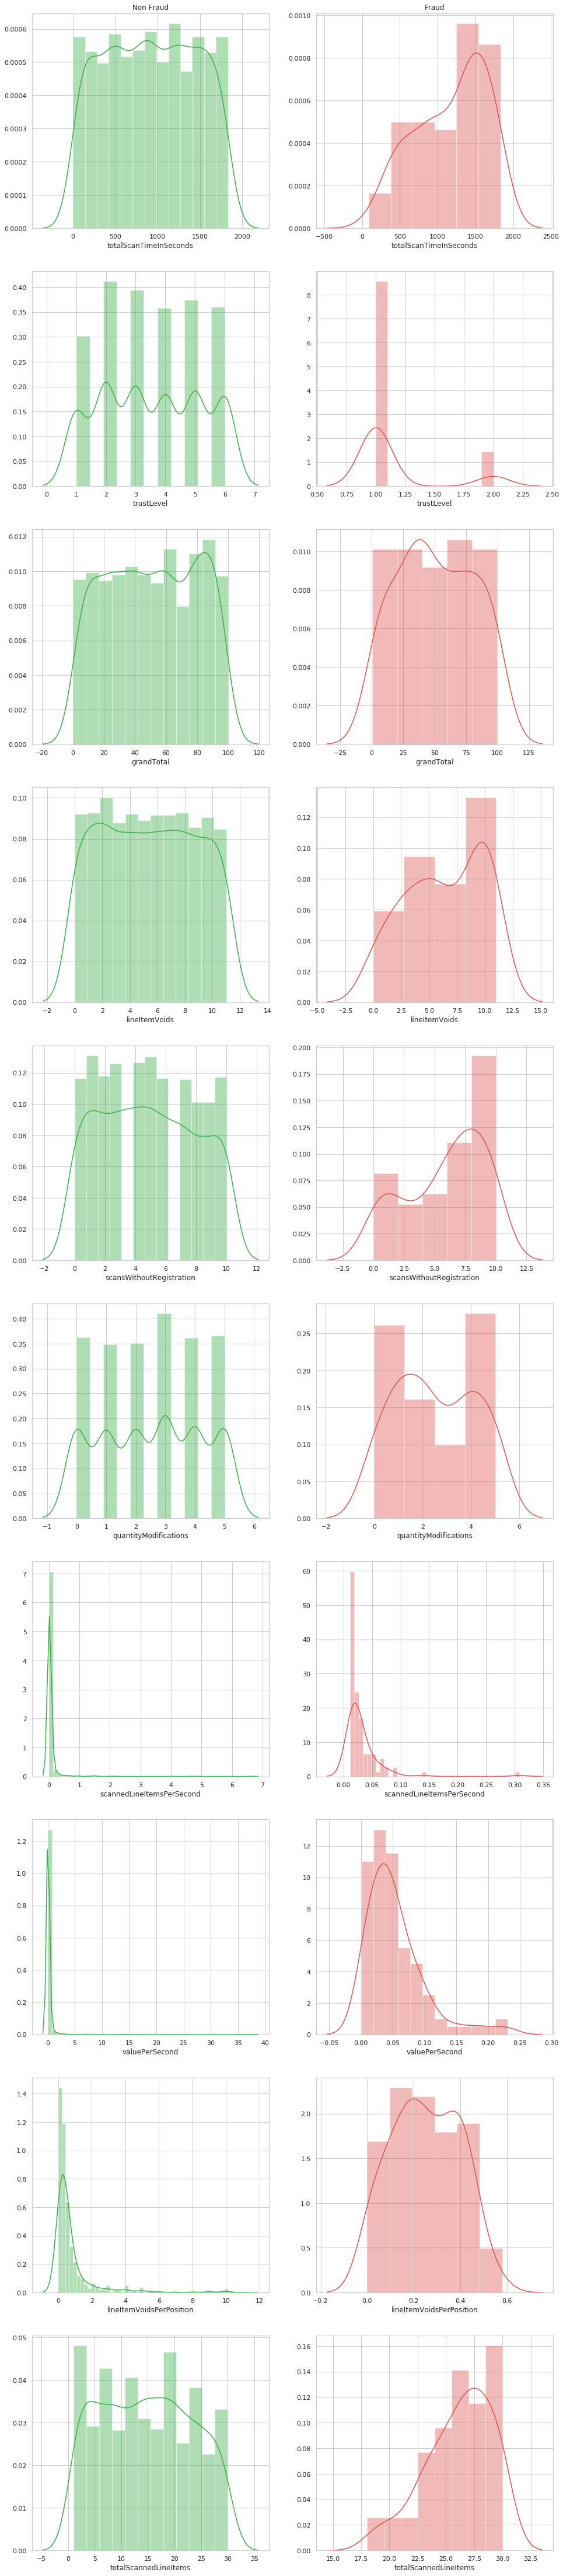

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(16, 80))
for ax, col in zip(axs[0], ["Non Fraud", "Fraud"]):
    ax.set_title(col)
n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], ax=axs[0][0],color=n_fraud_color)
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1],ax=axs[0][1], color=fraud_color)

sns.distplot(df_train.trustLevel[df_train.fraud == 0],ax=axs[1][0],color=n_fraud_color)
sns.distplot(df_train.trustLevel[df_train.fraud == 1],ax=axs[1][1], color=fraud_color)

sns.distplot(df_train.grandTotal[df_train.fraud == 0], ax=axs[2][0],color=n_fraud_color)
sns.distplot(df_train.grandTotal[df_train.fraud == 1],ax=axs[2][1], color=fraud_color)

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],ax=axs[3][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1],ax=axs[3][1], color=fraud_color)

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], ax=axs[4][0],color=n_fraud_color)
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1],ax=axs[4][1], color=fraud_color)

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],ax=axs[5][0],color=n_fraud_color)
sns.distplot(df_train.quantityModifications[df_train.fraud == 1],ax=axs[5][1], color=fraud_color)

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0], ax=axs[6][0],color=n_fraud_color)
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1],ax=axs[6][1], color=fraud_color)

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],ax=axs[7][0],color=n_fraud_color)
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1],ax=axs[7][1], color=fraud_color)

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],ax=axs[8][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1],ax=axs[8][1], color=fraud_color)

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0], ax=axs[9][0],color=n_fraud_color)
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1],ax=axs[9][1], color=fraud_color)


## Plotting distribution of frauds and non frauds in one graphic

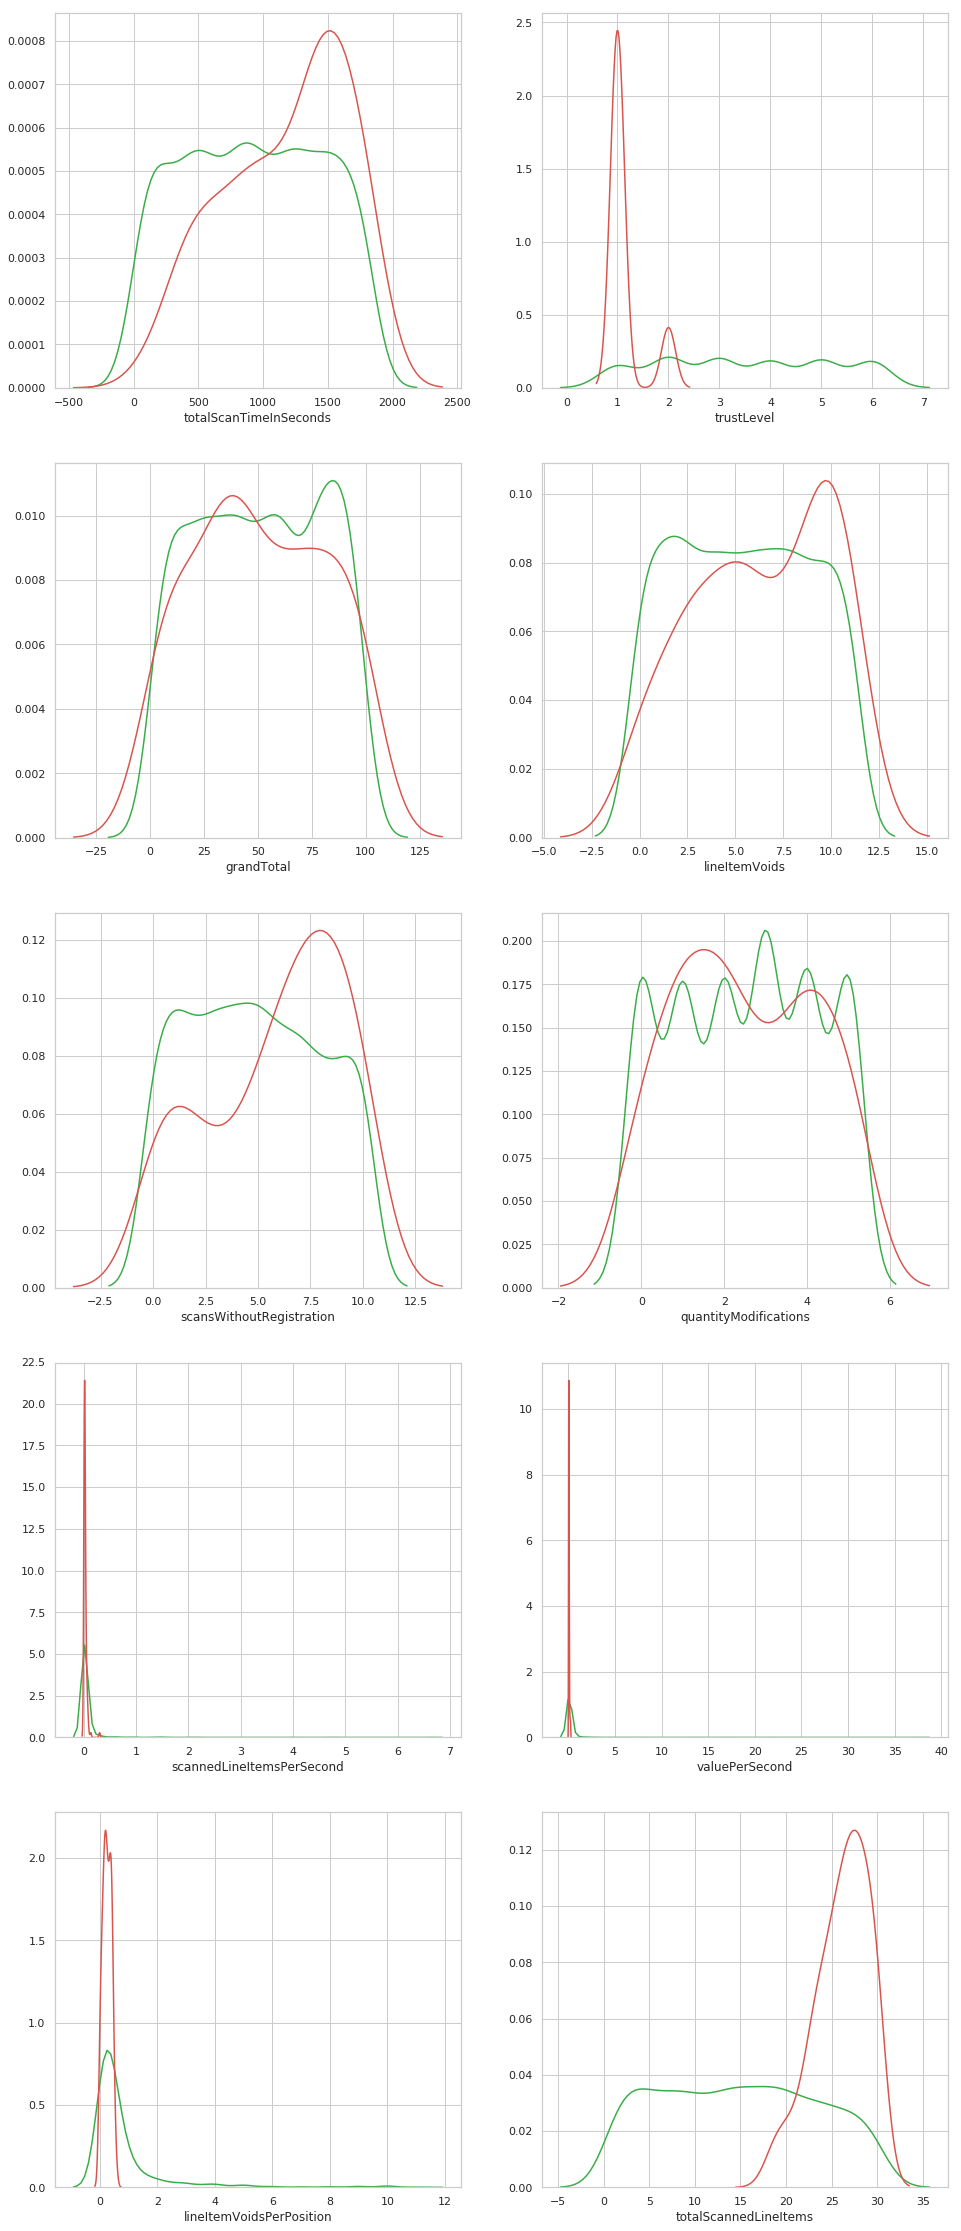

In [21]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_train.trustLevel[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_train.grandTotal[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])

## Scale Data using Quantile Transform

In [10]:
from sklearn.preprocessing import QuantileTransformer
frauds = df_train.fraud
df_wo_frauds = df_train.drop(['fraud'], axis=1)
heads = list(df_wo_frauds.columns.values)
qt = QuantileTransformer(n_quantiles=10, random_state=0)
df_transformed = pd.DataFrame(qt.fit_transform(df_wo_frauds), columns=heads)
df_transformed['fraud'] = frauds

## Plottin quantile transformed data:  [Quantile Transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html)

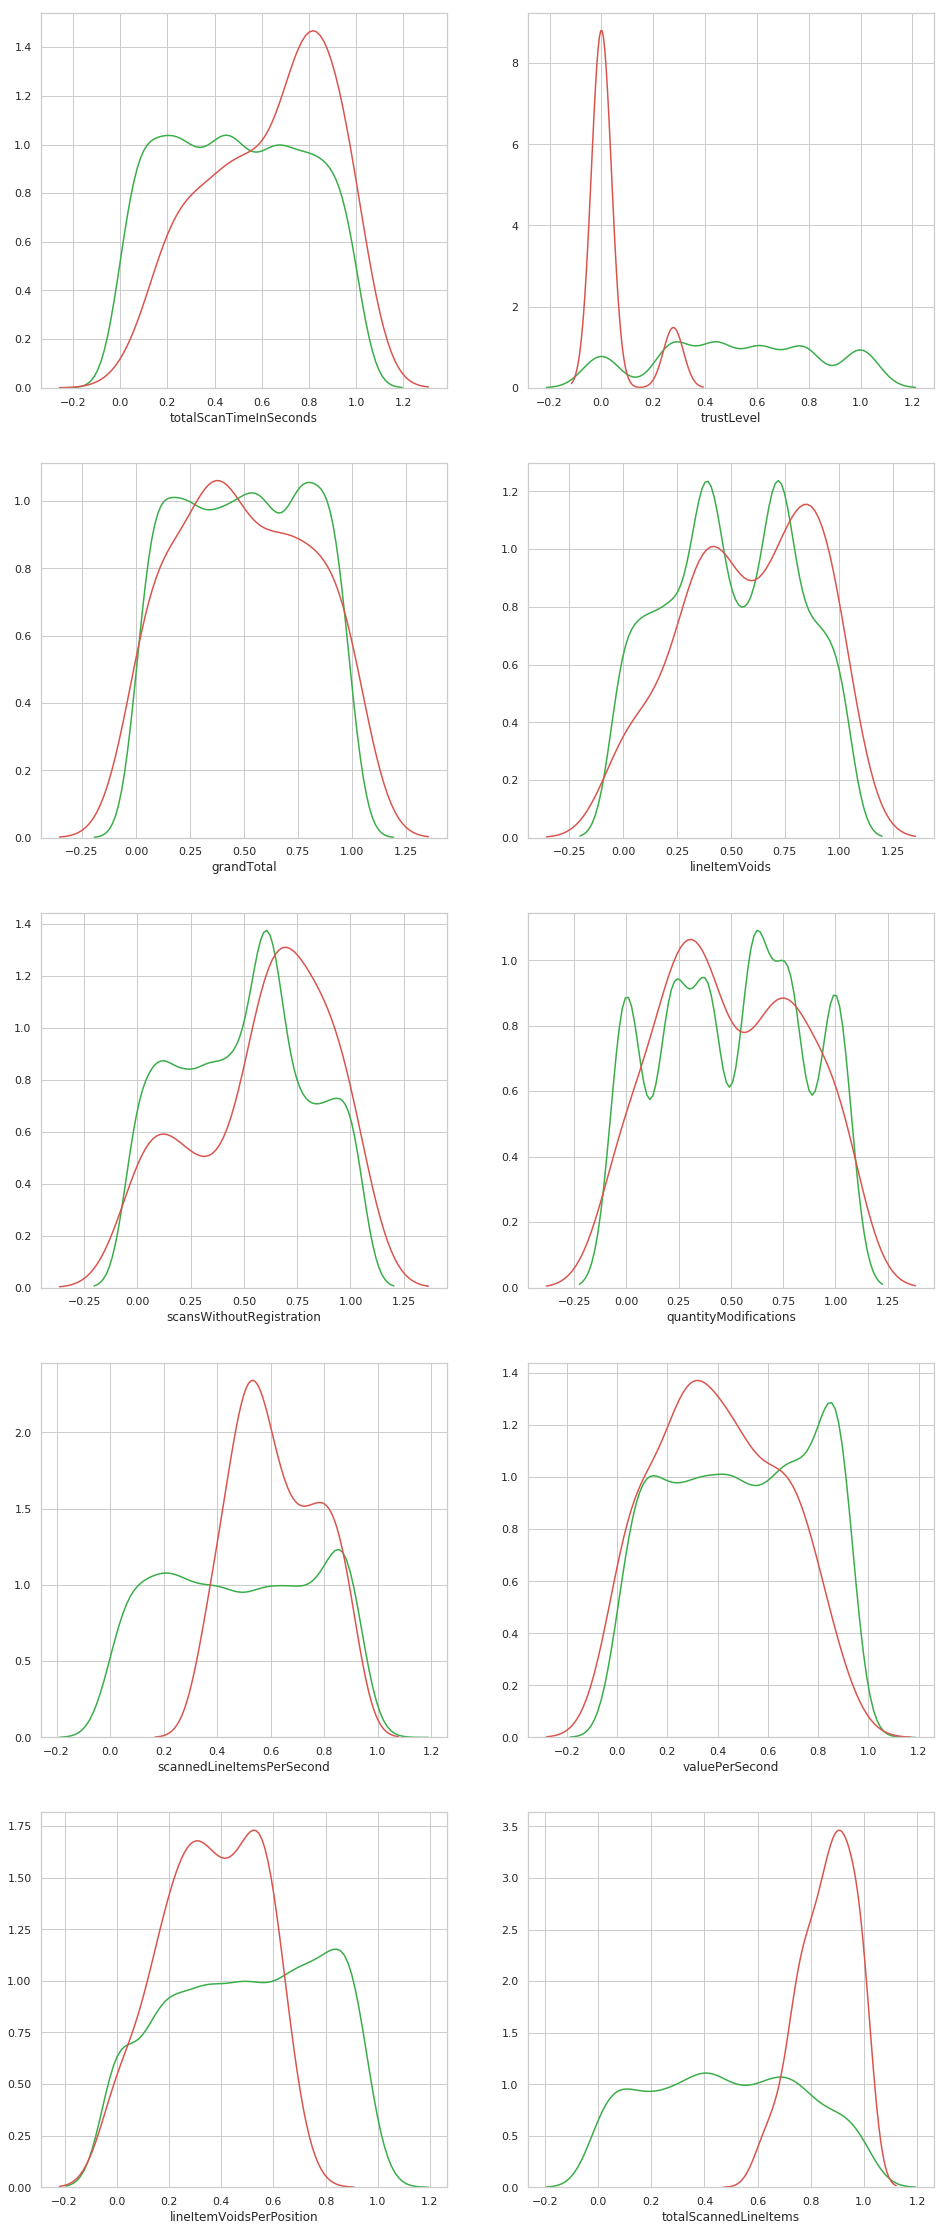

In [11]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])